In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# run this line for interactive plotting (IPython)
# %matplotlib notebook

# run this line when using vs code 
%matplotlib inline

# 9.1 A Brief matplotlib API Primer

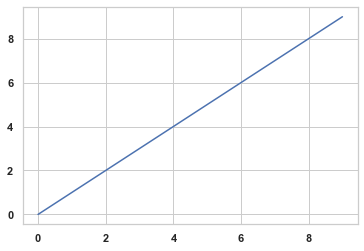

In [61]:
# create a simple line plot

data = np.arange(10) # create data

plt.plot(data) # plot the data 

## 9.1.1 Figures and Subplots

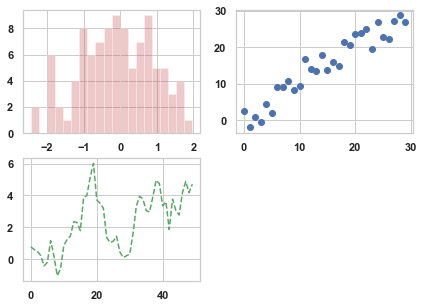

In [62]:
# plots in matplotlib reside within a 'Figure' object. You can create a new figure with plt.figure()
# plt.figure() has a number of options
# 'figsize' will guarantee the figures has a certain size and aspect ratio when saved to disk
fig = plt.figure(figsize=(7, 5))

# you can't make a plot with a blank figure
# instead, you have to create one or more subplots using the add_subplot() instance method
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# this means the figure should be 2x2 (up to 4 plots in total)
# and we're selecting the first 3 out of 4 subplots (numbered from 1)


# when you issue a plotting command like plt.plot(...)
# matplotlib draws on the last figure and subplot used (creating one if necessary)
# so this next plot will be draw on the 3rd subplot (ax3)
plt.plot(np.random.randn(50).cumsum(), 'g--')  # 'g--' is a style option


# the objects returned by fig.add_subplot() are 'AxesSubplot' objects
# you can directly plot on these subplot by calling each one's instance method

# check the cell where the figure is drawn (IPython)
_ = ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


# remember: In jupyter notebook, plots are reset after each cell is evaluated
# so for more complex plots you must put all of the plotting commands in a single notebook cell

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

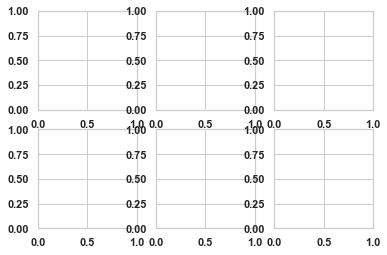

In [63]:
# creating a figure with a grid of subplots is a very common task
# so matplotlib includes plt.subplots() method 
# that creates a new figure and returns a Numpy array containing the created subplot object
fig, axes = plt.subplots(2, 3)

axes # Numpy array contains all subplots created

### 9.1.1.1 Adjusting the Spacing around Subplots

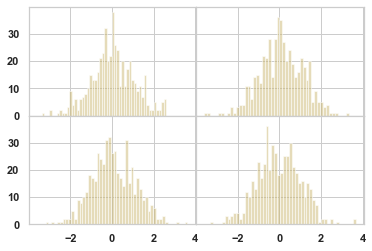

In [64]:
# by default, matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots
# this spacing is all specified relative to the height and width of the plot
# so that if you resize the plot either programatically or manually, the plot will dynamically adjust itself
# you can change the spacing using the subplots_adjust() method on 'Figure' objects, also available as a top-level function

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='y', alpha=0.5)

# 'wspace' and 'hspace' controls the percent of the figure width and figure height
plt.subplots_adjust(wspace=0, hspace=0)

## 9.1.2 Colors, Markers, and Line Styles

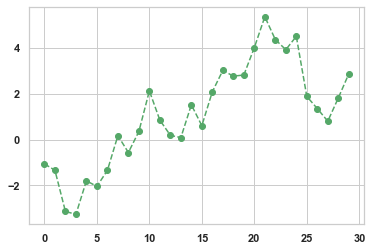

In [65]:
# matplotlib's main plot() function accepts array of x and y coordinates
# and optionally a string abbreviation indicating color and line style
# example:
# ax.plot(x, y, 'g--') # plot x versus y with 'green dashes'
# the same plot could also have been expressed more explicitly using keyword arguments
# example:
# ax.plot(x, y, linestyle='--', color='g')
# plots can additionally have markers, to highlight the actual data points

fig, ax = plt.subplots()
plt.plot(np.random.randn(30).cumsum(), 'go--')
# plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='--', marker='o') # works the same

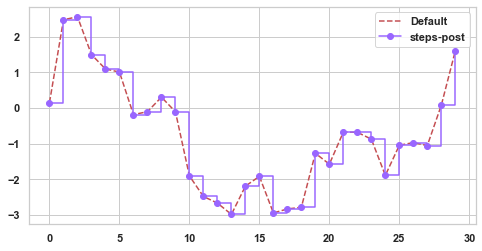

In [66]:
# for line plots, you will notice that subsequent points are linearly interpolated by default
# this can be altered with the 'drawstyle' option
fig, ax = plt.subplots(figsize=(8, 4))
data = np.random.randn(30).cumsum()

ax.plot(data, 'r--', label='Default')
ax.plot(data, color='#9966ff', drawstyle='steps-post', label='steps-post', marker='o')
ax.legend(loc='best')

## 9.1.3 Ticks, Labels, and Legends


For most kinds of plot decorations, there are 2 main ways to do things:
- Using the procedural 'pyplot interface'
- Using the object-oriented 'matplotlib API'

The pyplot interface can be used in two ways: <e.g.: plt.xlim()>
- Called with no arguments returns the current parameter value 
 - e.g.: plt.xlim() returns the current x-axis plotting range
- Called with parameters sets the parameter value 
 - e.g.: plt.xlim([0, 10]) sets the x-axis range to 0 to 10

Each of the pyplot method corresponds to two methods on the subplot object itself: 
 - e.g.: ax.get_xlim() and ax.set_xlim()

### 9.1.3.1 Setting the title, axis labels, ticks, and ticklabels

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 0, 'Stages'),
 Text(0, 0.5, 'Magnitude')]

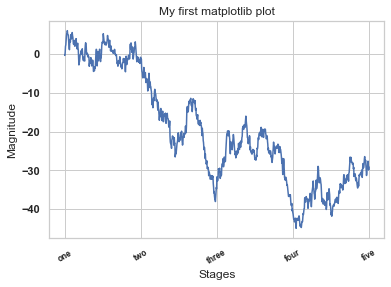

In [67]:
# create a simple plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# to change the x-axis ticks, use set_xticsks() and set_xticklabels()
xticks = ax.set_xticks([0, 250, 500, 750, 1000])
xticklabels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                                rotation=30, fontsize='small')

# set subplot title using set_title()
ax.set_title('My first matplotlib plot')
# set x-axis label using set_xlabel()
ax.set_xlabel('Stages')
# set y-axis label using set_ylabel()
ax.set_ylabel('Magnitude')

# the AxesSubplot class has a set() method that allows batch setting of plot properties
# so the above lines could be rewritten as
props = {
    'title' : 'My first matplotlib plot',
    'xlabel' : 'Stages',
    'ylabel' : 'Magnitude'
}

ax.set(**props)

### 9.1.3.2 Adding Legends

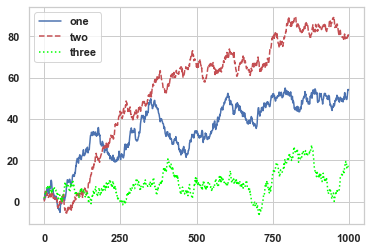

In [68]:
# legends are another critical element for identifying plot elements
# the easiest way to create one is to pass the 'label' argument when adding each piece of the plot

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xticks = ax.set_xticks([0, 250, 500, 750, 1000])

ax.plot(np.random.randn(1000).cumsum(), 'b', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'r--', label='two')
ax.plot(np.random.randn(1000).cumsum(), color='#00ff00', linestyle='dotted', label='three')

# once you're done, you can either call ax.legend() or plt.legend() to automatically create a legend
# the 'loc' argument is for setting the position for the legend
# if you are not picky, then 'loc=best' usually is the way to go
ax.legend(loc='best') 

## 9.1.4 Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

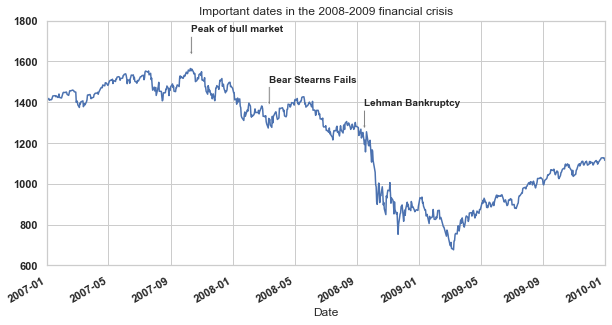

In [69]:
# in addition to the standard plot types, you may wish to draw your own plot annotations
# you can add annotation using the text(), arrow(), and annotate() functions

from datetime import datetime

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# create data
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='b-') # Series's plot method

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
            xytext=(date, spx.asof(date) + 225),
            arrowprops=dict(facecolor='gray', headwidth=4, width=2, headlength=4),
            horizontalalignment='left', 
            verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2010'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

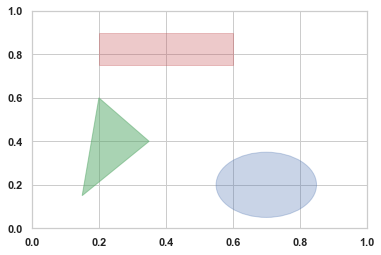

In [70]:
# drawing shapes requires some more care 
# matplotlib has objects that represent many common shapes, reffered to as 'patches'
# some of these, like Rectangle() or Circle() are found in matplotlib.pyplot
# but the full set is located in matplotlib.patches

# to add a shape to a plot, you create a 'Shape' object <shp> and add it to a subplot by calling ax.add_patch(shp)

fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='r', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.1.5 Saving Plots to File

In [71]:
# you can save the active figure to file using plt.savefig() or the fig.savefig() instance method
# available options includes
#    # 'dpi': controls dots-per-inch resolution
#    # 'bbox-inches': trim whitespace around the actual figure

# savefig() doesn't have to write to disk; it can also write to any file-like object, such as a BytesIO
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

## 9.1.6 matplotlib Configuration

In [72]:
# matplotlib comes configured with color schemes and defaults
# one way to modify the configuration programmatically from Python is to use the plt.rc() method
# the first argument to rc() is the component you wish to customize:
    # e.g. 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'
# after that can follow a sequence of keyword arguments indicating the new parameters

# for example, to set the global default figure size to be 10x10
plt.rc('figure', figsize=(10, 10))

# or to customize the font
font_options = {'family' : 'monospace',
                'weight' : 'bold', 
                'size' : 13}

plt.rc('font', **font_options)

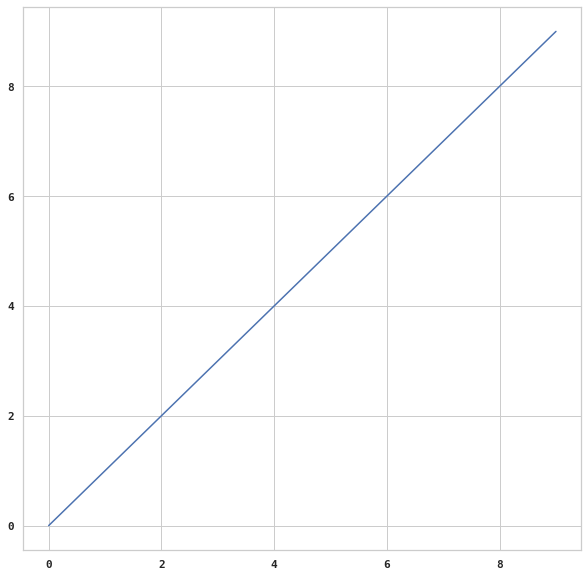

In [73]:
# you can create a plot to check the result here

data = np.arange(10)

plt.plot(data)

# 9.2 Plotting with pandas and seaborn


---

**matplotlib** can be a fairly low-level tool

**pandas** itself has built-in methods that simplify creating visualization from DataFrame and Series objects

another library is **seaborn**, a statistical graphics library that simplifies creating many common visualization types

## 9.2.1 Line Plots

<AxesSubplot:>

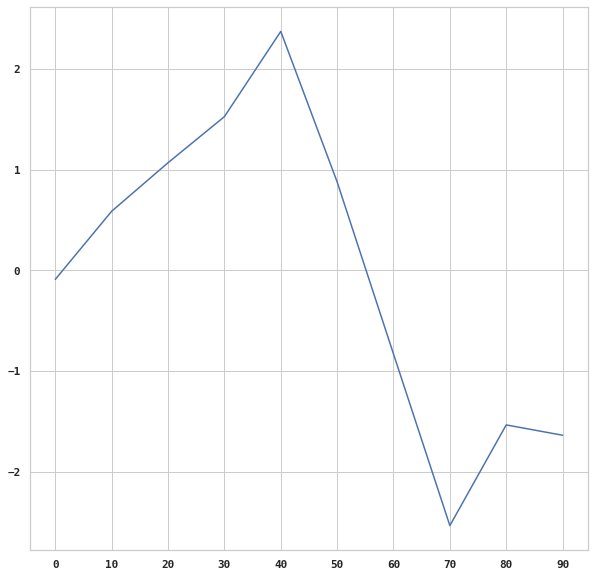

In [74]:
# Series and DataFrame each have a plot attribute for making some basic plot types
# the 'plot' attribute contains a family of different plot types, and plot() is equivalent to plot.line()
# so, by default, plot() makes line plots 

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(xticks=[i*10 for i in range(10)])

<AxesSubplot:>

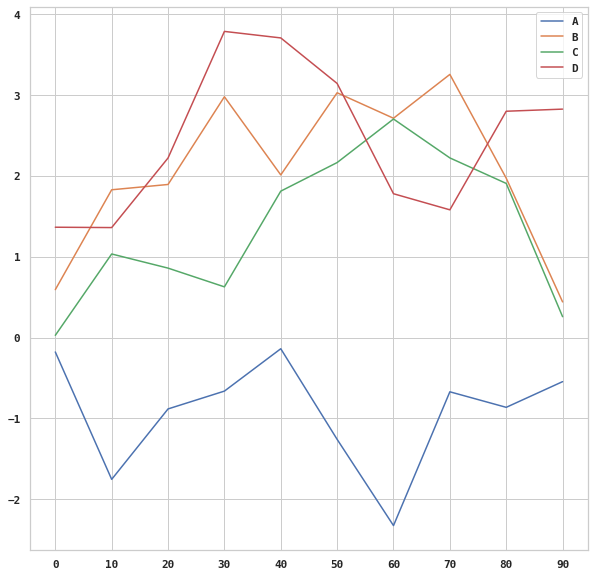

In [75]:
# DataFrame's plot method plots each of its columns as a different line on the same subplot, creating legend automatically
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot(xticks=[i*10 for i in range(10)])

## 9.2.2 Bar Plots

<AxesSubplot:>

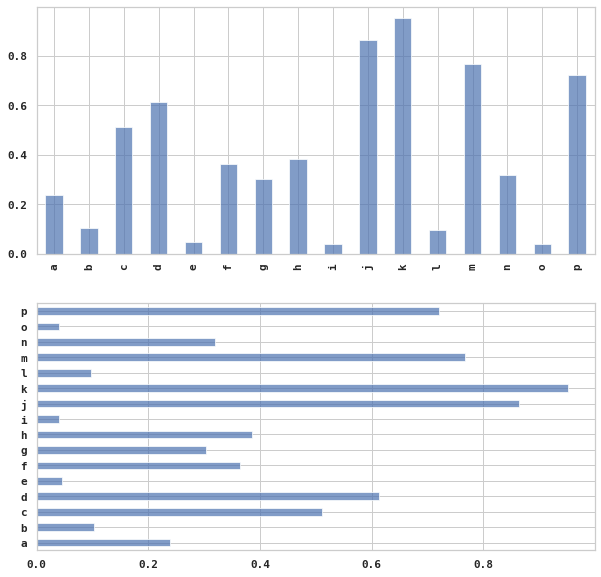

In [76]:
# the plot.bar() and plot.barh() make vertical and horizontal bar plots

fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], alpha=0.7)
data.plot.barh(ax=axes[1], alpha=0.7)

In [77]:
# with a DataFrame, bar plots group the values in each row together in a group in bars, side by side

# create data
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.978252,0.614800,0.102991,0.864737
two,0.988243,0.745626,0.983195,0.939379
three,0.720610,0.312814,0.572944,0.508047
four,0.578310,0.068598,0.251504,0.949981
five,0.482130,0.634351,0.762131,0.682673
six,0.871938,0.783609,0.307254,0.763641


<AxesSubplot:>

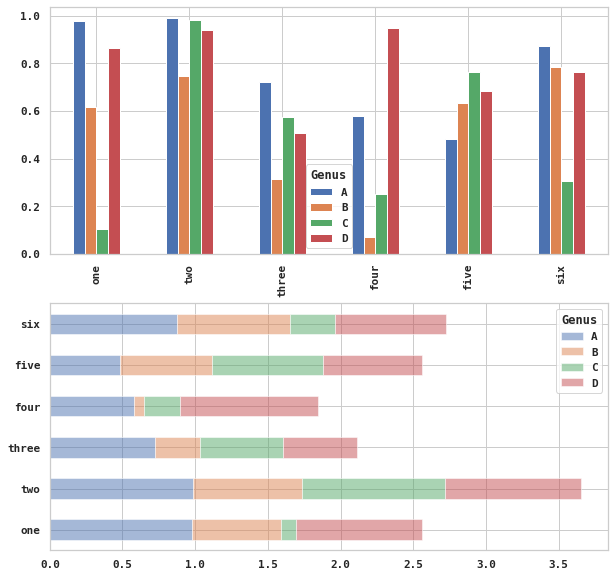

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

df.plot.bar(ax=ax[0])

# we created stacked bar plots by passing stacked=True
df.plot.barh(ax=ax[1], stacked=True, alpha=0.5)

In [79]:
# suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day

tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [80]:
# not many size 1 and size 6 parties, so we discard it
party_counts = party_counts.loc[:, 2:5]

# normalize so that each row sum to 1 
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

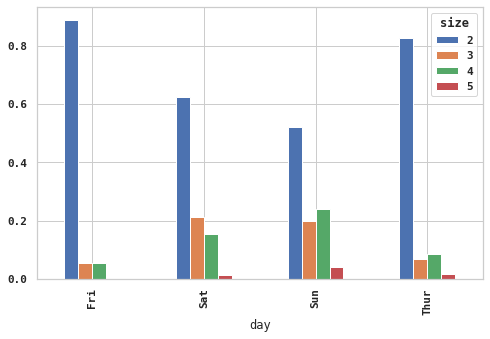

In [81]:
# plot the data
party_pcts.plot.bar(ax=plt.figure(figsize=(8,5)).add_subplot(1, 1, 1))

In [82]:
# with data that requires aggregation or summarization before making a plot
# using the seaborn package can make things much simpler

import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

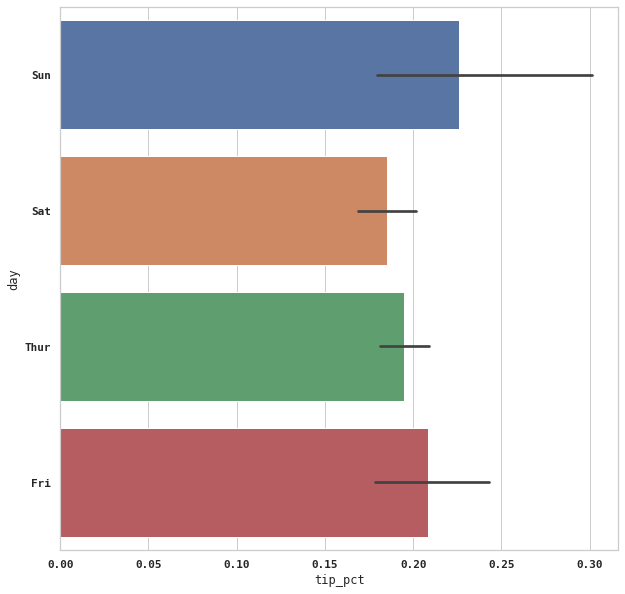

In [83]:
# plotting functions in seaborn take a 'data' argument, which can be a pandas DataFrame
# the black lines represent the 95% confidence interval
sns.barplot(x='tip_pct', y='day', data=tips, orient='horizontal')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

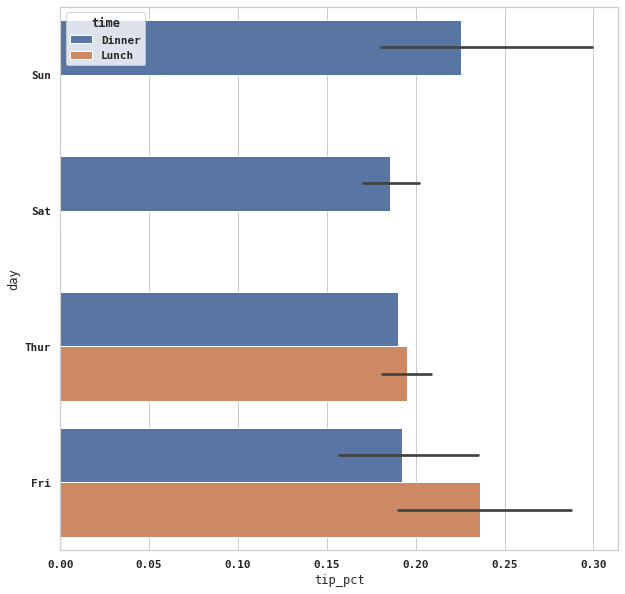

In [84]:
# seaborn.barplot() has a 'hue' option that enables us to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='horizontal')

In [85]:
# notice that seaborn has automatically changed the aesthetics of plots
# the default color palette, plot background, and grid line colors
# you can switch between different plot appearances using seaborn.set()

sns.set(style='whitegrid')

## 9.2.3 Histograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

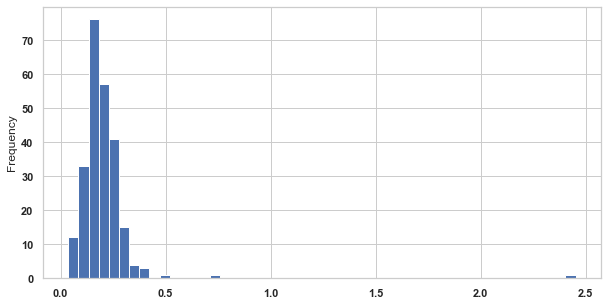

In [111]:
# a histogram is a kind of bar plot that gives a discretized display of value frequency
# the data points are split into discrete, evenly spaced bin, and the number of data points in each bin is plotted
# we can create a histogram by using plot.hist() on Series
ax = plt.figure(figsize=(10, 5)).add_subplot(1, 1, 1)
tips['tip_pct'].plot.hist(ax=ax, bins=50)

<AxesSubplot:ylabel='Density'>

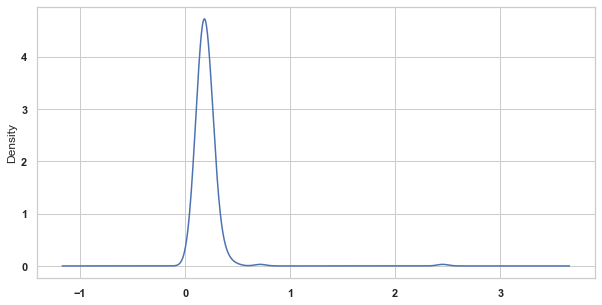

In [112]:
# a related plot type is a density plot
# which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data
# use plot.density() or plot.kde() (kernel density estimate) to create a density plot
ax = plt.figure(figsize=(10, 5)).add_subplot(1, 1, 1)
tips['tip_pct'].plot.density(ax=ax)

Text(0.5, 1.0, 'My seaborn plot')

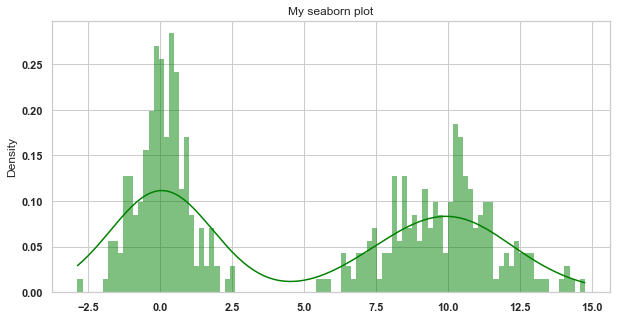

In [122]:
# seaborn makes histograms and density plots even easier through its sns.distplot() method
# which can plot both a histogram and a continuous density estimate simultaneously
ax = plt.figure(figsize=(10, 5)).add_subplot(1, 1, 1)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

# sns.distplot(values, bins=100) # has deprecated so we will use sns.histplot() instead
plot = sns.histplot(values, ax=ax, bins=100, kde=True, stat="density", linewidth=0, color='green')
plot.set_title('My seaborn plot')

## 9.2.4 Scatter or Point Plots

In [89]:
# point plots or scatter plots can be a useful way of examining the relationship between two 1-dimensional data series

# create data
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

# compute log differences
trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

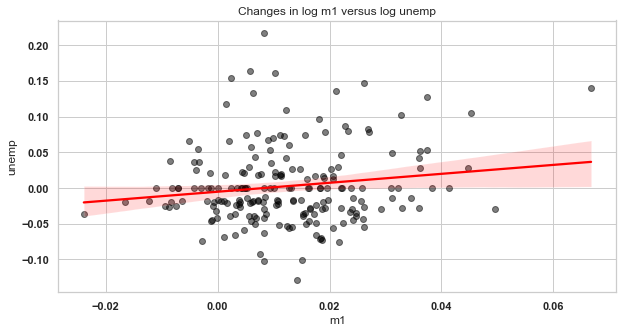

In [134]:
# we can use sns.regplot() method to make a scatter plot and fits a linear regression line
ax = plt.figure(figsize=(10, 5)).add_subplot(1, 1, 1)

sns.regplot(ax=ax, x='m1', y='unemp', data=trans_data, 
            scatter_kws=dict(color='black', alpha=0.5), marker='o', 
            line_kws=dict(color='red'))
plt.title('Changes in log {} versus log {}'.format('m1', 'unemp'))

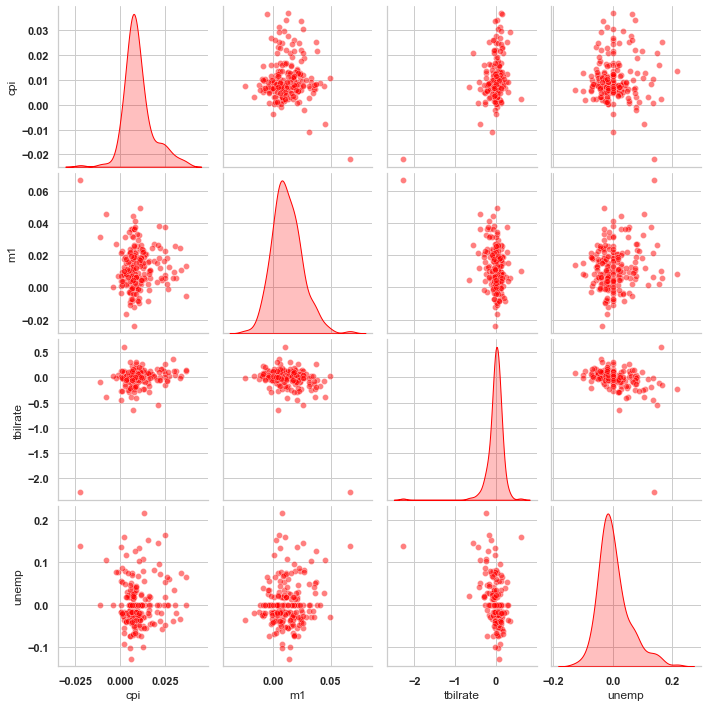

In [150]:
# in exploratory data analysis, it's helpful to be albe to look at all the scatter plots among a group of variables
# this is known as a 'pairs plot' or a 'scatter plot matrix'
# seaborn has a sns.pairplot() function which helps placing histograms or density estimate of each variable along the diagonal

# 'plot_kws' enables us to pass down configuration options

sns.pairplot(trans_data, diag_kind='kde', 
             plot_kws={'alpha' : 0.5, 'color' : 'red'},
             diag_kws={'color' : 'red'})

## 9.2.5 Facet Grids and Categorical Data

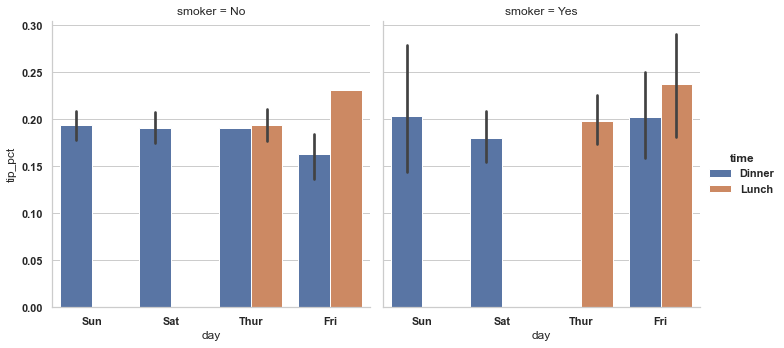

In [92]:
# seaborn has a useful function sns.factorplot() that simplifies making many kinds of faceted plots

# sns.factorplot() has been renamed to sns.catplot()
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips['tip_pct'] < 1])

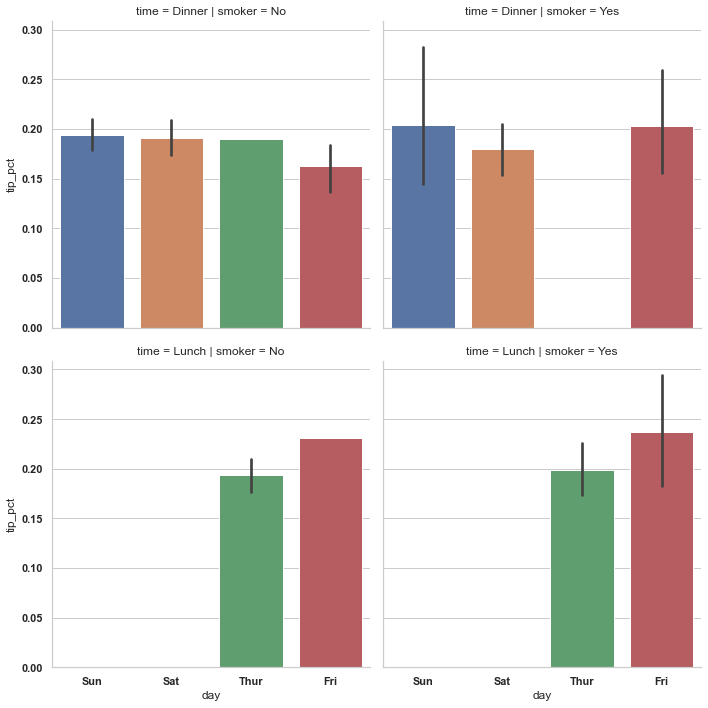

In [152]:
# instead of grouping by 'time' by different bar colors within a facet
# we can also expand the facet grid by adding one row per 'time' value

sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips['tip_pct'] < 1])

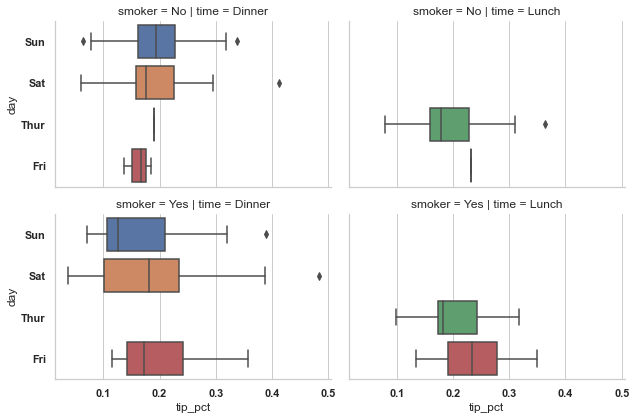

In [164]:
# sns.catplot() supports other plot type 
# example, box plots can be an effective visualization type

sns.catplot(x='tip_pct', y='day', row='smoker', col='time', kind='box', data=tips[tips['tip_pct'] < 0.5],
            height=3, aspect=1.5)

# 9.3 Other Visualization Tools

with tools like **Bokeh** and **Plotly**, it's now possible to specify dynamic, interactive graphics in Python that are destined for a web browser.

For creating *static graphics* for print or web, I recommend defaulting to **matplotlib** and add-on libraries like **pandas** and **seaborn** for your needs.

For other data visualization requirements, it may be useful to learn one of the other available tools out there, like: Tableau, Power BI, Excel,...

I encourage you to explore the ecosystem as it continues to involve and innovate into the future!